In [1]:
import os
import numpy as np
import tensorflow as tf
from scipy.misc import imread
import matplotlib.pyplot as plt
%matplotlib inline

/home/abhishek/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
pruned_model_file = "digits_net_frozen.pb"
model_directory = "model_files_10"

In [3]:
ss = tf.Session()

In [4]:
model_file_reader = open(os.path.join(os.getcwd(), os.path.join(model_directory, pruned_model_file)), "rb")

In [5]:
tf.import_graph_def(tf.GraphDef.FromString(model_file_reader.read()))

In [6]:
input_node = ss.graph.get_tensor_by_name("import/Placeholder:0")

In [7]:
output_node = ss.graph.get_tensor_by_name("import/class_predictions:0")

In [8]:
sample_img = imread(os.path.join(os.getcwd(), "mnist_png/testing/4/1010.png"))

/home/abhishek/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


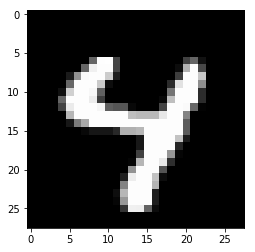

In [9]:
plt.imshow(sample_img, cmap = "gray")

In [10]:
sample_img_input = sample_img.reshape((1, 1, sample_img.shape[0], sample_img.shape[1]))
class_predicted = ss.run(output_node, feed_dict = {input_node : sample_img_input})

In [11]:
print("Class Predicted : " + str(class_predicted))

Class Predicted : [4]
